## Определение перспективного тарифа для телеком компании

### Описание проекта
Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

### Описание тарифов

#### Тариф «Смарт»
Ежемесячная плата: 550 рублей  
Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика  
Стоимость услуг сверх тарифного пакета:  
минута разговора: 3 рубля  
сообщение: 3 рубля  
1 Гб интернет-трафика: 200 рублей  

#### Тариф «Ультра»
Ежемесячная плата: 1950 рублей
Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика  
Стоимость услуг сверх тарифного пакета:  
минута разговора: 1 рубль  
сообщение: 1 рубль  
1 Гб интернет-трафика: 150 рублей  
Обратите внимание: «Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута.  

### Описание данных

#### Описание таблиц
##### Таблица users (информация о пользователях):

- user_id — уникальный идентификатор пользователя
- first_name — имя пользователя
- last_name — фамилия пользователя
- age — возраст пользователя (годы)
- reg_date — дата подключения тарифа (день, месяц, год)
- churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
- city — город проживания пользователя
- tarif — название тарифного плана

##### Таблица calls (информация о звонках):

- id — уникальный номер звонка
- call_date — дата звонка
- duration — длительность звонка в минутах
- user_id — идентификатор пользователя, сделавшего звонок
- Таблица messages (информация о сообщениях):

- id — уникальный номер сообщения
- message_date — дата сообщения
- user_id — идентификатор пользователя, отправившего сообщение

##### Таблица internet (информация об интернет-сессиях):

- id — уникальный номер сессии
- mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
- session_date — дата интернет-сессии
- user_id — идентификатор пользователя

##### Таблица tariffs (информация о тарифах):

- tariff_name — название тарифа
- rub_monthly_fee — ежемесячная абонентская плата в рублях
- minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
- messages_included — количество сообщений в месяц, включённых в абонентскую плату
- mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
- rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
- rub_per_message — стоимость отправки сообщения сверх тарифного пакета
- rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

<a id='back'><a/> 
# Задачи исследования
    
### [1. Изучение данных](#1)

- изучим тблицы
- сделаем предварительные выводы

### [2. Замена типа данных](#2)

- найти и обработать пропуски
- заменить некорректные типы данных

### [3. Исправление ошибок в данных](#3)

- найти и исправьте ошибки в данных

### [4. Расчетные значения для каждого пользователя](#4)

- количество сделанных звонков и израсходованных минут разговора по месяцам
- количество отправленных сообщений по месяцам
- объем израсходованного интернет-трафика по месяцам
- помесячную выручку с каждого пользователя
(вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика, остаток умножьте на значение из тарифного плана)

### [5. Анализ данных](#5)

- Опишите поведение клиентов оператора, исходя из выборки
- Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа
в месяц? 
- Посчитайте среднее количество, дисперсию и стандартное отклонение
- Постройте гистограммы. Опишите распределения

### [6. Проверка гипотез](#6)

- средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются
- средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

### [7. Общие выводы](#7)

- Общие выводы

Приступим к исследованию данных.

<a id='1'><a/> 
## 1. Изучение данных
[Назад к оглавлению](#back)

In [369]:
#импортируем необходимые для работы библиотеки
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)
import math 

import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from functools import reduce
idx = pd.IndexSlice
from scipy import stats as st

In [370]:
#прочитаем файлы
users = pd.read_csv('/datasets/users.csv')
calls = pd.read_csv('/datasets/calls.csv')
messages = pd.read_csv('/datasets/messages.csv')
internet = pd.read_csv('/datasets/internet.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')

In [371]:
#отобразим все столбцы таблицы и округлим числа до сотых
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format

Посмотрим рандомные выборки из имеющихся таблиц.

In [372]:
#пользователи
users.sample(5)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
370,1370,48,2018-10-27,Новороссийск,Гектор,Сысоев,2018-02-06,smart
406,1406,68,NaN,Казань,Станислав,Семёнов,2018-12-15,smart
244,1244,68,NaN,Москва,Геральд,Макеев,2018-05-09,smart
93,1093,73,NaN,Санкт-Петербург,Вероника,Лапина,2018-06-29,smart
235,1235,26,NaN,Москва,Агафья,Басова,2018-10-06,smart


In [373]:
#звонки
calls.sample(5)

,id,call_date,duration,user_id
69156,1174_196,2018-03-31,5.56,1174
108452,1280_371,2018-10-22,19.02,1280
95124,1241_80,2018-09-02,16.98,1241
191241,1471_44,2018-07-03,8.43,1471
123758,1318_757,2018-05-12,13.79,1318


In [374]:
#смс-сообщения
messages.sample(5)

,id,message_date,user_id
78016,1330_42,2018-09-27,1330
37350,1164_19,2018-11-18,1164
99771,1409_72,2018-12-17,1409
101901,1416_218,2018-08-18,1416
75926,1321_204,2018-04-13,1321


In [375]:
#интернет
internet.sample(5)

,Unnamed: 0,id,mb_used,session_date,user_id
29421,29421,1102_295,303.59,2018-10-23,1102
59830,59830,1203_78,0.00,2018-05-25,1203
34603,34603,1120_175,705.55,2018-09-17,1120
120621,120621,1407_153,125.86,2018-08-15,1407
11467,11467,1040_90,199.37,2018-07-03,1040


In [376]:
#тарифные планы
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [377]:
#посмотрим информацию по таблицам
for data in [users, calls, messages, internet, tariffs]: print(data.info(), end='\n\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), obje

Мы видим, что присутствуют пропущенные значения и типы данных в таблицах не везде соотвествуют необходимым.

Датасет содержит данные по 500 клиентам, потребуется заменить тип данных у столбцов с датой и временем, а также округлить значения минут разговора и мегабайт использованного трафика в большую сторону, так как тарифы считаются по минутам и мегабайтам.

Кроме того, после объединения данных (сводная таблица по звонкам, по сообщениям и интернет-трафику) возникнут пропущенные значения (клиент мог в каком-то месяце не писать сообщений, но звонить и использовать интернет), которые также нужно будет заменить на нули.

<a id='2'><a/> 
## 2. Замена типа данных
[Назад к оглавлению](#back)

In [378]:
#заменим тип данных дат на datetime там, где это необходимо
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')

In [379]:
#заменим тип на целочисленный там, где это необходимо
calls['id'] = calls['id'].astype('int')
calls['duration'] = calls['duration'].astype('int')
messages['id'] = messages['id'].astype('int')
internet['id'] = internet['id'].astype('int')
internet['mb_used'] = internet['mb_used'].astype('int')

Мы заменили формат тип данных на datetime и перевели все численные значения в целочисленные для удобства работы с данными в дальнейшем.

<a id='3'><a/> 
## 3. Исправление ошибок в данных
[Назад к оглавлению](#back)

##### Звонки

In [380]:
#посмотрим количество звонков с длительностью, равной нулю
print('Количество звонков с длительностью, равной нулю:', calls.loc[calls['duration'] == 0, 'duration'].value_counts()[0])

Количество звонков с длительностью, равной нулю: 47927


In [381]:
#добавим столбец со значением месяца
calls['month'] = calls['call_date'].dt.month

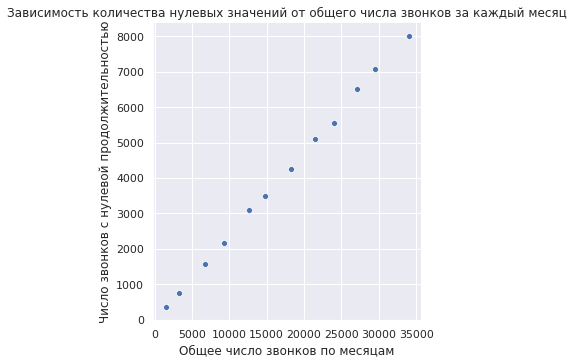

In [382]:
#построим график зависимости количества нулевых значений от общего числа звонков за каждый месяц
calls.loc[calls['duration'] == 0, 'nulls_count'] = 1
null_calls = calls.pivot_table(index='month', values=['id', 'nulls_count'], aggfunc='count')
null_calls['null_ratio'] = round(null_calls['nulls_count'] / null_calls['id'], 3)

sns.relplot(x='id', y='nulls_count', data=null_calls)
plt.xlabel('Общее число звонков по месяцам')
plt.ylabel('Число звонков с нулевой продолжительностью')
_ = plt.title('Зависимость количества нулевых значений от общего числа звонков за каждый месяц')

Как мы видим, появление звонков с нулевой продолжительностью систематично и имеет пропорциональную завивимость от общего числа звонков. Оператор округляет минтуы и мегабайты в большую сторону. Если человек проговорил всего секунду, то оператор засчитает ему это как минуту. Поэтому мы не будем заменять нулевые значения на единицу.

In [383]:
#округлим все значения в большую сторону (т.к. тариф считается по минутам и оператор округляет значения в большую сторону)
calls['duration'] = calls['duration'].apply(np.ceil)

Добавили столбец с указанием месяца, так как это необходимая информация для дальнейшего исследования. Округлили значения в большую сторону, так как так делает оператор.

##### Интернет-сессии

In [384]:
#добавим столбец со значением месяца
internet['month'] = internet['session_date'].dt.month

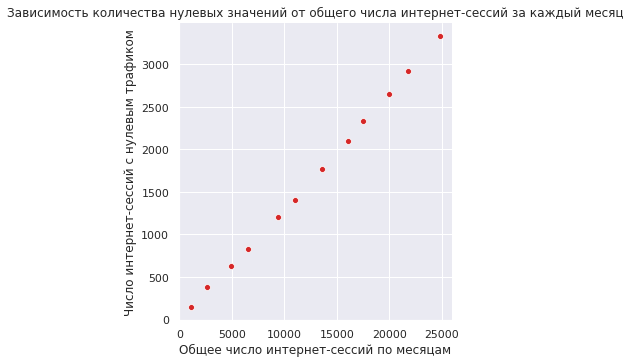

In [385]:
#построим график зависимости количества нулевых значений от общего числа Интернет-сессий за каждый месяц
internet.loc[internet['mb_used'] == 0, 'nulls_count'] = 1
null_mb = internet.pivot_table(index='month', values=['id', 'nulls_count'], aggfunc='count')
null_mb['null_ratio'] = round(null_mb['nulls_count'] / null_mb['id'], 3)

sns.relplot(x='id', y='nulls_count', data=null_mb, color='tab:red')
plt.xlabel('Общее число интернет-сессий по месяцам')
plt.ylabel('Число интернет-сессий с нулевым трафиком')
_ = plt.title('Зависимость количества нулевых значений от общего числа интернет-сессий за каждый месяц')

Ситуация аналогична ситуации со звонками.

In [386]:
#округлим все значения в большую сторону (т.к. тариф считается по минутам и оператор округляет значения в большую сторону)
internet['mb_used'] = internet['mb_used'].apply(np.ceil)

<a id='4'><a/> 
## 4. Расчетные значения для каждого пользователя
[Назад к оглавлению](#back)

In [387]:
#сводная таблица по звонкам
calls_grouped = calls_temp.pivot_table(values=['unique_users', 'duration'], 
                       index=['user_id', 'month'], 
                       aggfunc={'unique_users': 'count', 'duration': 'sum'})
calls_grouped.columns = ['duration', 'calls']

In [388]:
#сводная таблица по сообщениям
messages['month'] = messages['message_date'].dt.month
messages_grouped = messages_temp.pivot_table(values='unique_users', 
                       index=['user_id', 'month'], 
                       aggfunc={'unique_users': 'count'})
messages_grouped.columns = ['messages']

In [389]:
#сводная таблица по интернет-трафику
internet['month'] = internet['session_date'].dt.month
internet_grouped = internet_temp.pivot_table(values='mb_used', 
                       index=['user_id', 'month'], 
                       aggfunc={'mb_used': 'sum'})
internet_grouped.columns = ['mb_used']

In [390]:
#объединяем все три сводные таблицы в одну
dataframes = [calls_grouped, messages_grouped, internet_grouped]
grouped_data = reduce(lambda left,right: pd.merge(left,right,on=['user_id', 'month'], how='outer'), dataframes)
grouped_data.head(10)

duration  calls  messages   mb_used
user_id month                                     
1000    5        142.00  22.00     22.00  2,252.00
        6        144.00  43.00     60.00 23,213.00
        7        299.00  47.00     75.00 13,988.00
        8        367.00  52.00     81.00 14,043.00
        9        421.00  58.00     57.00 14,556.00
        10       306.00  57.00     73.00 14,690.00
        11       301.00  43.00     58.00 14,745.00
        12       295.00  46.00     70.00  9,808.00
1001    11       385.00  59.00       nan 18,405.00
        12       367.00  63.00       nan 14,018.00

Для каждого пользователя посчитаем помесячную выручку (вычтем бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножим на значение из тарифного плана; прибавим абонентскую плату, соответствующую тарифному плану).

In [391]:
#заменим пропущенные значения на нули
grouped_data.loc[grouped_data['duration'].isna(), 'duration'] = 0
grouped_data.loc[grouped_data['messages'].isna(), 'messages'] = 0
grouped_data.loc[grouped_data['mb_used'].isna(), 'mb_used'] = 0

In [392]:
#добавим наименование используемого тарифа для каждого пользователя
for user in grouped_data.index:
    grouped_data.loc[user, 'tariff'] = users.loc[user[0]-1000, 'tariff']

In [393]:
#напишем функцию подсчета выручки с каждого пользователя в месяц
def user_revenue(row):
    messages = row['messages']
    mb_used = row['mb_used']
    tariff = row['tariff']
    duration = row['duration']
    calls = row['calls']
    
    if tariff == 'smart':
        extra_duration = duration - tariffs.loc[0, 'minutes_included']
        extra_mb = mb_used - tariffs.loc[0, 'mb_per_month_included']
        extra_messages = messages - tariffs.loc[0, 'messages_included']
        
        if extra_duration < 0: extra_duration = 0
        if extra_mb < 0: extra_mb = 0
        if extra_messages < 0: extra_messages = 0
        
        return (tariffs.loc[0, 'rub_per_message'] * extra_messages + 
                   (tariffs.loc[0, 'rub_per_gb'] / 1024) * extra_mb + 
                   tariffs.loc[0, 'rub_per_minute'] * extra_duration + 
                   tariffs.loc[0, 'rub_monthly_fee']
                  ) 
    else:
        extra_duration = duration - tariffs.loc[1, 'minutes_included']
        extra_mb = mb_used - tariffs.loc[1, 'mb_per_month_included']
        extra_messages = messages - tariffs.loc[1, 'messages_included']
        
        if extra_duration < 0: extra_duration = 0
        if extra_mb < 0: extra_mb = 0
        if extra_messages < 0: extra_messages = 0
        
        return (tariffs.loc[1, 'rub_per_message'] * extra_messages + 
                   (tariffs.loc[1, 'rub_per_gb'] / 1024) * extra_mb + 
                   tariffs.loc[1, 'rub_per_minute'] * extra_duration + 
                   tariffs.loc[1, 'rub_monthly_fee']
                  )

grouped_data['revenue'] = grouped_data.apply(user_revenue, axis=1)
grouped_data.head(20)

duration  calls  messages   mb_used tariff  revenue
user_id month                                                     
1000    5        142.00  22.00     22.00  2,252.00  ultra 1,950.00
        6        144.00  43.00     60.00 23,213.00  ultra 1,950.00
        7        299.00  47.00     75.00 13,988.00  ultra 1,950.00
        8        367.00  52.00     81.00 14,043.00  ultra 1,950.00
        9        421.00  58.00     57.00 14,556.00  ultra 1,950.00
        10       306.00  57.00     73.00 14,690.00  ultra 1,950.00
        11       301.00  43.00     58.00 14,745.00  ultra 1,950.00
        12       295.00  46.00     70.00  9,808.00  ultra 1,950.00
1001    11       385.00  59.00      0.00 18,405.00  smart 1,144.73
        12       367.00  63.00      0.00 14,018.00  smart   550.00
1002    6        103.00  15.00      4.00 10,844.00  smart   550.00
        7        193.00  26.00     11.00 17,557.00  smart   979.10
        8        254.00  42.00     13.00 20,298.00  smart 1,514.45
        9        182.00  36.00      4.00 16,669.00  smart   805.66
        10       188.00  33.00     10.00 13,869.00  smart   550.00
        11       218.00  32.00     16.00 18,566.00  smart 1,176.17
        12       209.00  33.00     12.00 18,087.00  smart 1,082.62
1003    8        337.00  55.00     37.00  8,557.00  ultra 1,950.00
        9        856.00 134.00     91.00 12,457.00  ultra 1,950.00
        10       759.00 108.00     83.00 14,754.00  ultra 1,950.00

<a id='5'><a/> 
## 5. Анализ данных
[Назад к оглавлению](#back)

In [394]:
#посмотрим данные по тарифам
grouped_data['tariff'].value_counts()

smart    2229
ultra     985
Name: tariff, dtype: int64

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


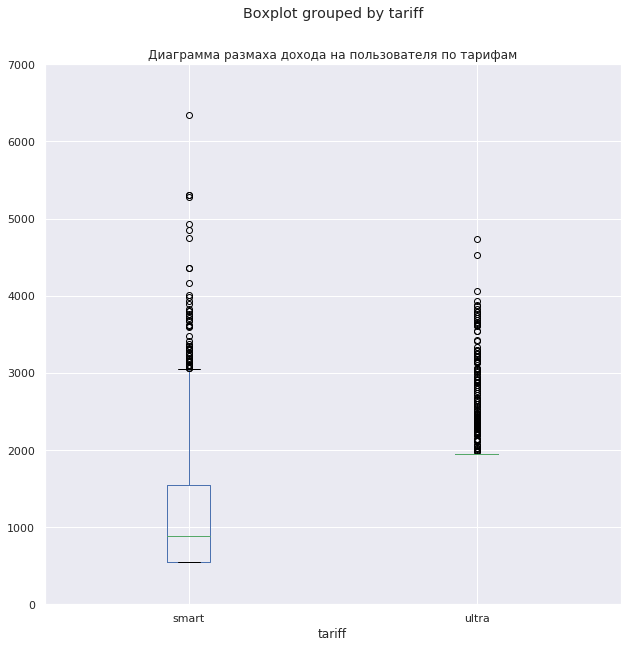

In [395]:
#построим диаграмму размаха дохода на пользователя по тарифам
grouped_data.boxplot('revenue', by='tariff', figsize=(10,10)).set_ylim(0,7000)
plt.title('Диаграмма размаха дохода на пользователя по тарифам')
plt.show()

Посчитаем, сколько в среднем каждому пользователю требуется минут, сообщений и мегабайт в месяц.

In [396]:
#найдем медианные значения
medians = grouped_data.pivot_table(index='user_id', values=['duration', 'messages', 'mb_used', 'revenue'], aggfunc='median')
for user_id in users['user_id']:
    medians.loc[user_id, 'tariff'] = users.loc[user_id-1000, 'tariff']
medians.head()

,duration,mb_used,messages,revenue,tariff
user_id,,,,,
1000,300.00,"14,299.50",65.00,"1,950.00",ultra
1001,376.00,"16,211.50",0.00,847.36,smart
1002,193.00,"17,557.00",11.00,979.10,smart
1003,729.00,"11,348.00",83.00,"1,950.00",ultra
1004,115.00,"17,794.00",154.50,"1,950.00",ultra


In [397]:
#найдем медиану, дисперсию и стандартное отклонение
medians.dropna(subset=['duration'], inplace=True)
desc_stat = medians.pivot_table(index=['tariff'], values=['revenue', 'duration', 'mb_used', 'messages'], 
                    aggfunc={'duration': [np.mean, np.median, np.var, np.std], 
                             'mb_used': [np.mean, np.median, np.var, np.std], 
                             'messages': [np.mean, np.median, np.var, np.std],
                             'revenue': [np.mean, np.median, np.var, np.std]})
desc_stat

duration                           mb_used                     \
           mean median    std       var      mean    median      std   
tariff                                                                 
smart    388.53 388.50 142.53 20,313.82 16,810.02 16,903.00 4,169.10   
ultra    495.02 476.00 269.87 72,831.66 20,284.04 19,714.75 8,884.30   

                     messages                        revenue                  \
                 var     mean median   std      var     mean   median    std   
tariff                                                                         
smart  17,381,406.05    33.77  28.50 28.01   784.60 1,164.48   979.88 662.09   
ultra  78,930,829.06    56.98  47.50 49.24 2,424.26 2,048.88 1,950.00 271.85   

                   
              var  
tariff             
smart  438,367.77  
ultra   73,904.53

##### Доход на пользователя

Text(0.5, 1.0, 'Гистограмма дохода на пользователя по тарифам Smart и Ultra')

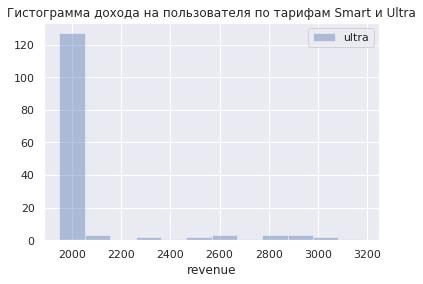

In [398]:
#построим гистограмму по тарифу "ultra"
for tariff in ['ultra']:
    sns.distplot(medians.query('tariff == @tariff')['revenue'], kde=False, label=tariff)
_ = plt.legend(['ultra'])
plt.title('Гистограмма дохода на пользователя по тарифам Smart и Ultra')

Text(0.5, 1.0, 'Гистограмма дохода на пользователя по тарифам Smart и Ultra')

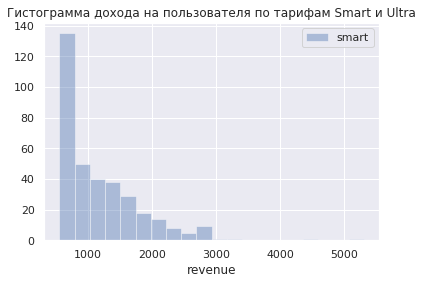

In [399]:
#построим гистограмму по тарифу "smart"
for tariff in ['smart']:
    sns.distplot(medians.query('tariff == @tariff')['revenue'], kde=False, label=tariff)
_ = plt.legend(['smart'])
plt.title('Гистограмма дохода на пользователя по тарифам Smart и Ultra')

Text(0.5, 1.0, 'Гистограмма дохода на пользователя по тарифам Smart и Ultra')

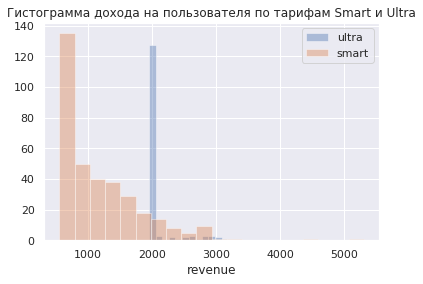

In [400]:
#совместим графики
for tariff in ['ultra', 'smart']:
    sns.distplot(medians.query('tariff == @tariff')['revenue'], kde=False, label=tariff)
_ = plt.legend(['ultra', 'smart'])
plt.title('Гистограмма дохода на пользователя по тарифам Smart и Ultra')

In [401]:
#общий доход на тарифе Smart
total_revenue_smart = grouped_data[grouped_data['tariff'] == 'smart'].revenue.sum()
total_revenue_smart

2603678.1640625

In [402]:
#общий доход на тарифе Ultra
total_revenue_ultra = grouped_data[grouped_data['tariff'] == 'ultra'].revenue.sum()
total_revenue_ultra

2028318.75

##### Продолжительность звонков

Text(0.5, 1.0, 'Гистограмма продолжительности звонков в тарифе Smart')

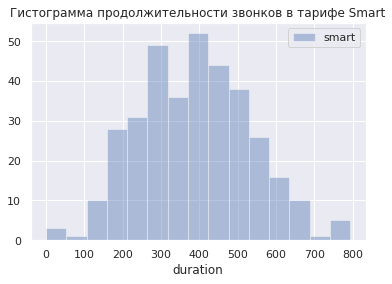

In [403]:
#тариф smart
for tariff in ['smart']:
    sns.distplot(medians.query('tariff == @tariff')['duration'], kde=False, label=tariff)
_ = plt.legend(['smart'])
plt.title('Гистограмма продолжительности звонков в тарифе Smart')

Text(0.5, 1.0, 'Гистограмма продолжительности звонков в тарифе Ultra')

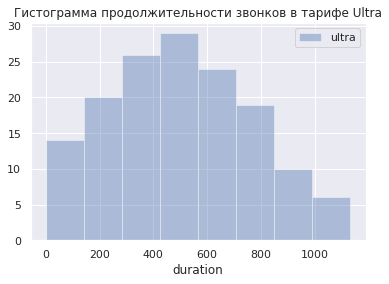

In [404]:
#тариф Ultra
for tariff in ['ultra']:
    sns.distplot(medians.query('tariff == @tariff')['duration'], kde=False, label=tariff)
_ = plt.legend(['ultra'])
plt.title('Гистограмма продолжительности звонков в тарифе Ultra')

Text(0.5, 1.0, 'Гистограмма дохода на пользователя по тарифам Smart и Ultra')

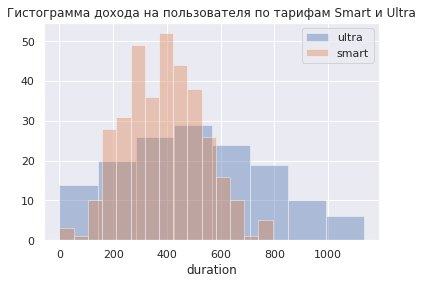

In [405]:
#совместим графики
for tariff in ['ultra', 'smart']:
    sns.distplot(medians.query('tariff == @tariff')['duration'], kde=False, label=tariff)
_ = plt.legend(['ultra', 'smart'])
plt.title('Гистограмма дохода на пользователя по тарифам Smart и Ultra')

In [406]:
calls.head()

,id,call_date,duration,user_id,month,nulls_count
0,10000,2018-07-25,0.00,1000,7,1.00
1,10001,2018-08-17,0.00,1000,8,1.00
2,10002,2018-06-11,2.00,1000,6,nan
3,10003,2018-09-21,13.00,1000,9,nan
4,10004,2018-12-15,5.00,1000,12,nan


На тарифе Smart люди в месяц говорят около 380 минут, на Ультре 470 минут в месяц. То есть на Смарте люди подходят к краю своего тарифа, а на Ультре у них остается запас 2500 минут. Среднее и медиана в обоих тарифах примерно равнозначны.

Text(0.5, 1, 'Диаграмма использования звонков по месяцам на тарифах Ultra и Smart')

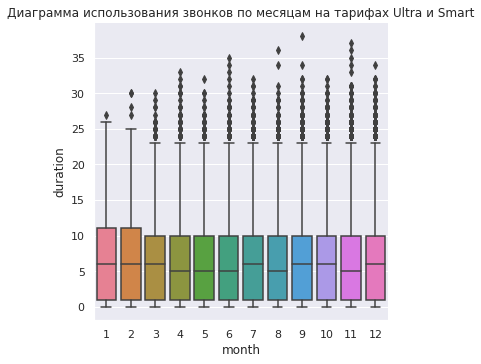

In [407]:
#поведение пользователей относительно звонков на обоих тарифах по месяцам
sns.catplot(x='month', y="duration", kind="box", data=calls, palette='husl')
plt.title('Диаграмма использования звонков по месяцам на тарифах Ultra и Smart')

Любопытно, что пользователи используют звонки более активно в январе и феврале. Возможно это связано с тем, что люди больше обшаются в большие новогодние каникулы, а после каникул активно возвращаются к работе. "Мегалайн" может предложить своим пользователям интересные предложения по звонкам на данный период времени, чтобы привлечь больше пользователей.

##### Использование интернета

Text(0.5, 1.0, 'Гистограмма использования интернета на тарифе Smart')

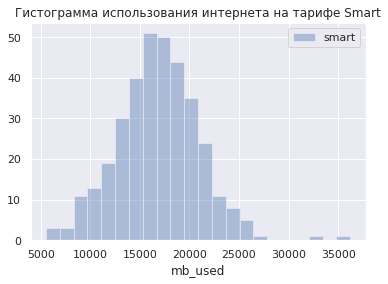

In [408]:
#тариф smart
for tariff in ['smart']:
    sns.distplot(medians.query('tariff == @tariff')['mb_used'], kde=False, label=tariff)
_ = plt.legend(['smart'])
plt.title('Гистограмма использования интернета на тарифе Smart')

Text(0.5, 1.0, 'Гистограмма использования интернета на тарифе Ultra')

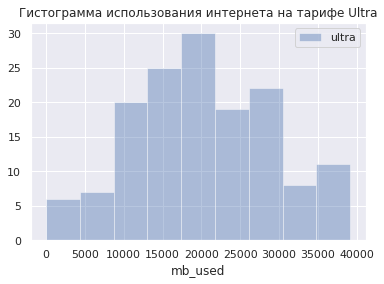

In [409]:
#тариф Ultra
for tariff in ['ultra']:
    sns.distplot(medians.query('tariff == @tariff')['mb_used'], kde=False, label=tariff)
_ = plt.legend(['ultra'])
plt.title('Гистограмма использования интернета на тарифе Ultra')

Text(0.5, 1.0, 'Гистограмма дохода на пользователя по тарифам Smart и Ultra')

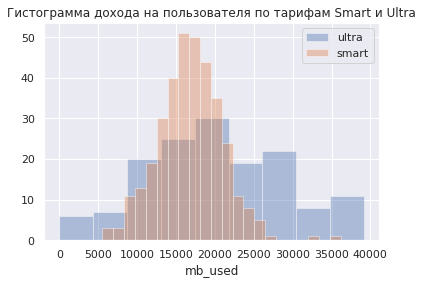

In [410]:
#совместим графики
for tariff in ['ultra', 'smart']:
    sns.distplot(medians.query('tariff == @tariff')['mb_used'], kde=False, label=tariff)
_ = plt.legend(['ultra', 'smart'])
plt.title('Гистограмма дохода на пользователя по тарифам Smart и Ultra')

Среднее и медиана лежат рядом в обоих тарифах так же как и звонки. На Смарте люди выходят за пределы тарифа больше, у Ультры снова запас — в 10 Гб.

Text(0.5, 1, 'Диаграмма использования интернета по месяцам на тарифах Ultra и Smart')

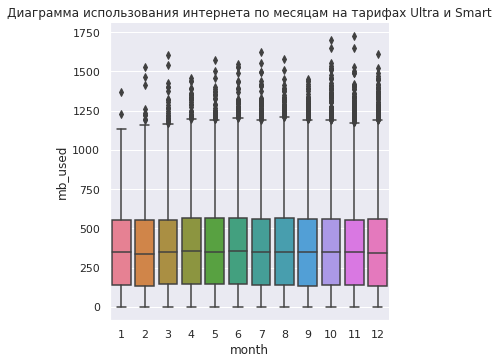

In [411]:
#поведение пользователей относительно звонков на обоих тарифах по месяцам
sns.catplot(x='month', y="mb_used", kind="box", data=internet, palette='husl')
plt.title('Диаграмма использования интернета по месяцам на тарифах Ultra и Smart')

Как мы видим, пользователи довольно "ровно" пользуются интернетом в течение всего года.

##### Использование СМС-сообщений

Text(0.5, 1.0, 'Гистограмма использования смс-сообщений на тарифе Smart')

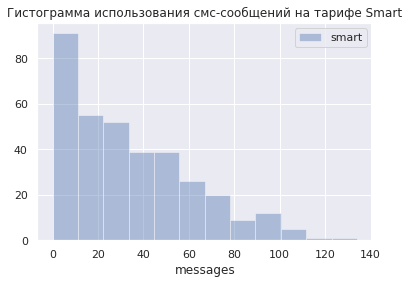

In [412]:
#тариф smart
for tariff in ['smart']:
    sns.distplot(medians.query('tariff == @tariff')['messages'], kde=False, label=tariff)
_ = plt.legend(['smart'])
plt.title('Гистограмма использования смс-сообщений на тарифе Smart')

Text(0.5, 1.0, 'Гистограмма использования смс-сообщений на тарифе Ultra')

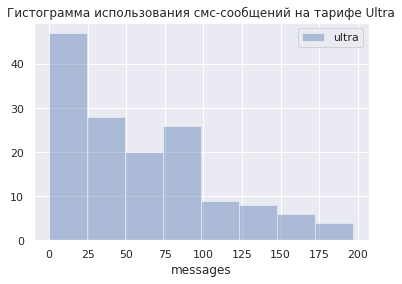

In [413]:
#тариф ultra
for tariff in ['ultra']:
    sns.distplot(medians.query('tariff == @tariff')['messages'], kde=False, label=tariff)
_ = plt.legend(['ultra'])
plt.title('Гистограмма использования смс-сообщений на тарифе Ultra')

Text(0.5, 1.0, 'Гистограмма дохода на пользователя по тарифам Smart и Ultra')

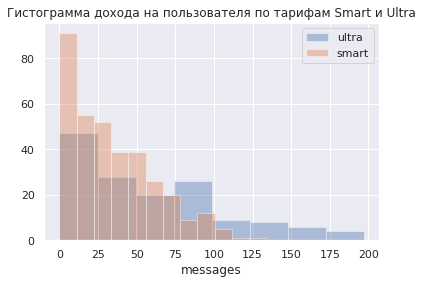

In [414]:
#совместим графики
for tariff in ['ultra', 'smart']:
    sns.distplot(medians.query('tariff == @tariff')['messages'], kde=False, label=tariff)
_ = plt.legend(['ultra', 'smart'])
plt.title('Гистограмма дохода на пользователя по тарифам Smart и Ultra')

В этом случае поведение пользователей очень похоже. Похоже, что в век интернета смс не пользуется почти никто :)

Можно сделать вывод, что дисперсия по тарифу "Смарт" меньше, чем у пользователей с тарифом "Ультра" по всем показателям: по длительности разговора, числу сообщений и использованному интернет-трафику. Также на гистограммах видно, что мода у "Смарта" явно выражена.

Поведение пользователей тарифа "Ультра" более разнообразное с точки зрения потребления телекоммуникационных услуг. Пользователи более дорогого тарифа более свободны в выборе того, как именно использовать объемы тарифного пакета: возможно, использование дорогого тарифа помогает им не думать о том, что в какой-то момент у них отключится интернет или закончится пакет по минутам разговора.

<a id='6'><a/> 
## 6. Проверка гипотез
[Назад к оглавлению](#back)

Гипотеза о равенстве средних двух генеральных совокупностей №1  

##### Сформулируем гипотезы:

<b>H0</b>: выручка пользователей тарифов «Ультра» и «Смарт» не различается  
<b>H1</b>: выручка пользователей тарифов «Ультра» и «Смарт» различается

In [415]:
ultra = grouped_data.query('tariff == "ultra"')['revenue']
smart = grouped_data.query('tariff == "smart"')['revenue']

alpha = .05

results = st.ttest_ind(
    ultra, 
    smart)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.608240874897945e-234
Отвергаем нулевую гипотезу


In [416]:
grouped_data.pivot_table(index='tariff', values='revenue', aggfunc='median')

,revenue
tariff,
smart,886.67
ultra,"1,950.00"


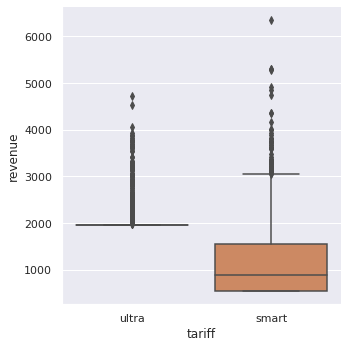

In [417]:
_ = sns.catplot(x="tariff", y='revenue', kind="box", data=grouped_data, orient='v')

Средние значения выручки по тарифам различаются почти в 2 раза. Если у пользователя подключен тариф "Смарт" с абонентской платой в 550 рублей, то он скорее всего по итогам месяца заплатит гораздо больше из-за нехватки услуг в рамках тарифного пакета.

Можно заключить с полной уверенностью, что доходы "Мегалайна" с пользователя по тарифу "Ультра" действительно отличаются по сравнению с доходами от тарифа "Смарт".

Гипотеза о равенстве средних двух генеральных совокупностей №2

##### Сформулируем гипотезы:

<b>H0</b>: средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов  
<b>H1</b>: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

In [418]:
#добавим в сгрупированную таблицу название населенного пункта для каждого пользователя
for user in grouped_data.index:
    grouped_data.loc[user, 'city'] = users.loc[user[0]-1000, 'city']

In [419]:
moscow = grouped_data.query('city == "Москва"')['revenue']
regions = grouped_data.query('city != "Москва"')['revenue']

alpha = .05

results = st.ttest_ind(
    moscow, 
    regions, 
    equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.35993705715615754
Не получилось отвергнуть нулевую гипотезу


In [420]:
#напишем функцию для категоризаии населенных пунктов на категории столица - Москва и регионы 
def region(city):
    if city == 'Москва': return 'Столица'
    else: return 'Регион'

In [421]:
grouped_data['region'] = grouped_data['city'].apply(region)
grouped_data.pivot_table(index='region', values='revenue', aggfunc='median')

,revenue
region,
Регион,"1,442.58"
Столица,"1,594.92"


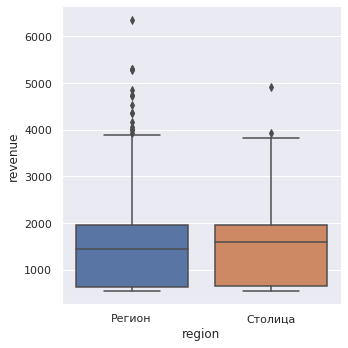

In [422]:
_ = sns.catplot(x="region", y='revenue', kind="box", data=grouped_data, orient='v')

Данный статистический тест не дал возможности опровергунть исходную гипотезу о том, что доходы от пользователей из Москвы и из других регионов равны. Действительно, доходы в Московском регионе практически не отличаются от других населенных пунктов.

<a id='7'><a/> 
## 7. Общие выводы
[Назад к оглавлению](#back)

По результатам данного анализа можно сделать вывод, что доходы от тарифа «Смарт» больше, чем от тарифа «Ультра». В среднем «Мегалайн» от одного пользователя на тарифе "Смарт"в месяц получает 980 рублей, в целом выручка с 500 пользователей составила 2 603 678р. На тарифе "Ультра" выручка с одного пользователя в среднем 1950 рублей, в целом доход с 500 пользователей составил 2 028 318р. 

Особенности использования тарифов заключаются в следующем:

Пользователям тарифа «Смарт» не хватает услуг в рамках тарифного пакета: кроме абонентской платы пользователи в среднем доплачивают дополнительно за услуги сверх тарифа. Это в целом является выгодным для оператора, но может разочаровать пользователей и привести к оттоку. 
Пользователи тарифа «Ультра», напротив, не используют тарифный пакет в полном объеме.

Можно предположить, что пользователи в погоне за выгодой подключаются на более бюджетный тариф, но в последствии из-за нехватки предоставленных услуг, входящих в пакет, часть пользователей будет переходить на более дорогой пакет или же есть риск, что пользователи уйдут к другому оператору.  

Средние доходы от пользователей в Москве не отличаются от доходов в других населенных пунктах: разница статистически незначима (p-значение: 0.359) и составляет 188 руб.: 1595 руб. в Москве против 1440 руб в других населенных пунктах.

Так же 

И как оказалось, не смотря на то, что в тарифах предусмотрено большое количество смс-сообщений - ими никто не пользуется :)